<a href="https://colab.research.google.com/github/Akanerd/NaturalLanguangeProcessing-Orbit/blob/main/Hands_on_NLP_Week_6%20versi%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPAM : BAHASA INDONESIA

In [ ]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = 'https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv'
spam_bi = pd.read_csv(data)
spam_bi

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0


In [ ]:
spam_bi[spam_bi.label == 0]

,teks,label
574,Di kfc yg deket enhaii ada dy,0
575,"Maaf jika ada janji yang belum terpenuhi, jik...",0
576,*ngsih bunga ato coklat min,0
577,.sambl nunggu itu.. Gimana kalo ngerjain form ...,0
578,[Akademik] Untuk perhatian tuk jadwal kontrak ...,0
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0


In [ ]:
spam_bi[spam_bi.label == 1]

,teks,label
239,"Jika anda bermasalah dgn CC/KT@, stres dgn bun...",1
240,"Lelah byr min payment? Kami Solusinya, bantu s...",1
241,"Dana Tunai (KTA) bunga 0,99% hingga 300 jt. Sy...",1
242,“ROXI CELL” Hanya dengan Rp.100rb Anda bisa ja...,1
243,3 RAMADHAN Selamat Anda Pemenang Rp.100jt. PIN...,1
...,...,...
569,Yth Bpk/Ibu. BNI menyatakan Rekening anda terp...,1
570,Yth Isti Sofiyah. Diminta Segera Hubungi Bpk D...,1
571,YTH kpd bpk/ibu sy Eka Novitasari kariyawan 3c...,1
572,"YTH,MIitra Silahkan cek poin anda dan tukarkan...",1


In [ ]:
spam_bi[spam_bi.label == 2]

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
...,...,...
234,"Yuk INTERNET-an NGEBUT utk akses FB, Twitter, ...",2
235,"Yuk temen belanja di google play, mudah banget...",2
236,Yuk tetap gunakan Flash Volume Ultima utk upda...,2
237,Mau nonton bioskop gratis bersama keluarga? Ci...,2


Label:


*   0 : PESAN NORMAL
*   1 : SPAM/FRAUD
*   2 : SMS PROMOSI



In [ ]:
print('data kategori 2 sebanyak: ' + str(spam_bi[spam_bi.label == 2].shape[0]))

data kategori 2 sebanyak: 239


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


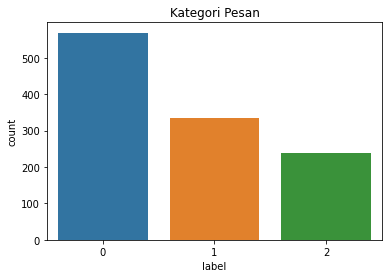

In [ ]:
plt.title('Kategori Pesan')
sns.countplot(spam_bi.label)
#tidak seimbang

##Preprocessing data teks

In [ ]:
!pip install Sastrawi

In [ ]:
import re
import nltk

1. Case Folding
2. Tokenizer
3. Stop word + remove punctuation
4. Stemming + Lemmatization

In [ ]:
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = re.sub(r' +', ' ', text)                      #white space
  text = text.strip()
  return text

In [ ]:
spam_bi['teks'].iloc[5]

'5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1'

In [ ]:
teks_5 = spam_bi['teks'].iloc[5]
x_5 = casefolding(teks_5)

In [ ]:
x_5

'hari lagi ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept cek detail promo di tselmemytsel'

In [ ]:
#tokenisasi memperhatikan spasi sebagai pemisah
x_5.split()

['hari',
 'lagi',
 'ekstra',
 'pulsa',
 'rb',
 'dg',
 'beli',
 'paket',
 'internet',
 'bulanan',
 'di',
 'mytelkomsel',
 'utk',
 'pembelian',
 'pertama',
 'sjk',
 'augsept',
 'cek',
 'detail',
 'promo',
 'di',
 'tselmemytsel']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords_ind = stopwords.words('indonesian')
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
len(stopwords_ind)

758

In [ ]:
#menambahkan stopwords dari NLTK
tambahan_stopwords = ['rb', 'gb', 'tsel']
stopwords_ind = stopwords_ind + tambahan_stopwords

In [ ]:
#stopword
def remove_stopword(teks) :
  clean_teks = []
  teks = teks.split()
  for i in teks :
    if i not in stopwords_ind:
      clean_teks.append(i)
  return " ".join(clean_teks)

In [ ]:
teks_5

'5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1'

In [ ]:
x_5_sw = remove_stopword(x_5)

In [ ]:
#stemming dan Lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer_factory = StemmerFactory()
ina_stemmer = stemmer_factory.create_stemmer()


In [ ]:
def stemming(teks):
  teks = ina_stemmer.stem(teks)
  return teks

In [ ]:
stemming(x_5_sw)

'ekstra pulsa dg beli paket internet bulan mytelkomsel utk beli sjk augsept cek detail promo tselmemytsel'

In [ ]:
#normalization (perbaikan berdasarkan kamus)
#woww -->wow    , wowww -->?

In [ ]:
kamus_normalisasi = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')
kamus_normalisasi.head(5)

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi


In [ ]:
def normalisasi(text):
  text = ' '.join([kamus_normalisasi[kamus_normalisasi['singkat'] == word]['hasil'].values[0] if (kamus_normalisasi['singkat'] == word).any() else word for word in text.split()])
  return text

In [ ]:
normalisasi('abis')

'habis'

###Pipeline NLP

In [ ]:
def preprocessing(teks):
  teks = casefolding(teks)
  teks = remove_stopword(teks)
  teks = stemming(teks)
  teks = normalisasi(teks)
  return teks

In [ ]:
preprocessing('Pembelian PAKET INternet 30 gb sudah terlaksana')

'beli paket internet laksana'

In [ ]:
%%time
spam_bi['clean'] = spam_bi['teks'].apply(preprocessing)

In [ ]:
spam_bi

In [ ]:
spam_bi.to_csv('/content/drive/MyDrive/EUNOIA/data_clean.csv')

Text Featurization and Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [ ]:
X = spam_bi.clean
y = spam_bi.label

In [ ]:
vec_uni = CountVectorizer(ngram_range=(1,1))
vec_uni.fit(X)

In [ ]:
print(len(vec_uni.get_feature_names_out()))

In [ ]:
vec_Bi = CountVectorizer(ngram_range=(2,2))
vec_Bi.fit(X)
print(vec_Bi.get_feature_names_out())

In [ ]:
kalimat = ['saya bermain bola','saya sedang belajar']
vec_Bi = CountVectorizer(ngram_range=(2,2))
vec_Bi.fit(kalimat)
print(vec_Bi.get_feature_names_out())

In [ ]:
kalimat = ['saya bermain bola','saya sedang belajar']
vec_Bi = CountVectorizer(ngram_range=(1,1))
vec_Bi.fit(kalimat)
print(vec_Bi.get_feature_names_out())

In [ ]:
print(vec_uni.get_feature_names_out())

In [ ]:
print(vec_Bi.get_feature_names_out())

In [ ]:
#ubah dalam bentuk array
X_unigram = vec_uni.transform(X).toarray()

X_unigram

```
# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle
```

In [ ]:
import pickle

#save fitur BoW unigram
with open('bow_unigram.pickle', 'wb') as output:
  pickle.dump(X_unigram, output)

#transform BoW bigram
X_Bigram = vec_Bi.transform(X).toarray()
with open('bow_bigram.pickle', 'wb') as output:
  pickle.dump(X_Bigram, output)


In [ ]:
#unigram
data_unigram = pd.DataFrame(X_unigram, columns=vec_uni.get_feature_names_out())
data_unigram

In [ ]:
#ubah dalam bentuk array
X_bigram = vec_Bi.transform(X).toarray()

#Bigram
data_bigram = pd.DataFrame(X_bigram, columns=vec_Bi.get_feature_names_out())
data_bigram

In [ ]:
spam_bi[spam_bi['clean'].str.contains('zona')]

###cek data sebelum preprocessing
```
WordCloud().process_text(text) #mengurutkan kata dengan frekuensi tertinggi
```

In [ ]:
pd.Series(' '.join(spam_bi.teks).split()).value_counts()
#perlu dilakukan casefolding

In [ ]:
pd.Series(' '.join(spam_bi.clean).split()).value_counts()

In [ ]:
def frekuensi_kata(teks):
  kalimat = []
  for i in teks:
    kalimat.append(i)
  return ' '.join(kalimat)

In [ ]:
corpus_clean = frekuensi_kata(spam_bi.clean)
corpus = frekuensi_kata(spam_bi.teks)

In [ ]:
from wordcloud import WordCloud

In [ ]:
frek_clean = WordCloud().process_text(corpus_clean)
frek = WordCloud().process_text(corpus)

In [ ]:
def sort_dict_by_value(d, reverse = True):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

In [ ]:
print(sort_dict_by_value(frek))

##TF-IDF

In [ ]:
vec_tfidf_uni = TfidfVectorizer(ngram_range=(1,1))
vec_tfidf_uni.fit(X)

In [ ]:
print(vec_tfidf_uni.get_feature_names_out())

In [ ]:
#ubah dalam bentuk array
X_unigram_tfidf = vec_tfidf_uni.transform(X).toarray()

#Unigram
data_unigram_tfidf = pd.DataFrame(X_unigram_tfidf, columns=vec_tfidf_uni.get_feature_names_out())
data_unigram_tfidf

In [ ]:
vec_tfidf_bi = TfidfVectorizer(ngram_range=(2,2))
vec_tfidf_bi.fit(X)

#ubah dalam bentuk array
X_bigram_tfidf = vec_tfidf_bi.transform(X).toarray()

#Bigram
data_bigram_tfidf = pd.DataFrame(X_bigram_tfidf, columns=vec_tfidf_bi.get_feature_names_out())
data_bigram_tfidf

In [ ]:
#save fitur BoW unigram
with open('tfidf_unigram.pickle', 'wb') as output:
  pickle.dump(X_unigram_tfidf, output)

#transform TFIDF bigram
with open('tfidf_bigram.pickle', 'wb') as output:
  pickle.dump(X_bigram_tfidf, output)

##Feature Selection

In [ ]:
X_baru = np.array(data_unigram_tfidf)
y_label = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [ ]:
chi2_features = SelectKBest(chi2, k = 1000) 
X_kbest_features = chi2_features.fit_transform(X_baru, y_label) 

In [ ]:
print('Original feature number:', X_baru.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

In [ ]:
#Menampilkan fitur beserta nilainya
feature =vec_tfidf_uni.get_feature_names()
feature

Data['Fitur'] = feature
Data

In [ ]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

In [ ]:
mask =chi2_features.get_support()
mask

In [ ]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

In [ ]:
new_feature

In [ ]:
data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

In [ ]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(data_selected_feature,open("selected_feature_tf-idf.pkl","wb"))

##Word Cloud

In [ ]:
import cv2

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

In [ ]:
# WordCloud Label SMS Normal

sms_normal = spam_bi[spam_bi.label == 0]
normal_string = []

for t in sms_normal.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# WordCloud Label SMS SPAM/FRAUD

sms_normal = spam_bi[spam_bi.label == 1]
normal_string = []

for t in sms_normal.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# WordCloud Label SMS PROMO

sms_normal = spam_bi[spam_bi.label == 2]
normal_string = []

for t in sms_normal.clean:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##Text Classification

Pada text classification ini kita akan menggunakan algoritma Machine learning khususnya: Naive Bayes dan Suport Vectoc Machine (SVM)

In [ ]:
#Feature Extraction sebelumnya menggunakan TFIDF Unigram
#import library
from sklearn import svm #model support vector machine
from sklearn.naive_bayes import MultinomialNB #multinomial naive bayes
from sklearn.model_selection import train_test_split
import random

In [ ]:
# tentukan X dan y
X = data_selected_feature
y = spam_bi.label

In [ ]:
#train test split data
x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state = 0)

Data displit sebanyak:


*   training : 914
*   testing : 229



In [ ]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritma fitting

text_algorithm = MultinomialNB()
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

In [ ]:
#prediksi

prediksi = model.predict(x_test)

prediksi

In [ ]:
#evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, prediksi))

In [ ]:
import seaborn as sns
ax= plt.subplot()

CM = confusion_matrix(y_test, prediksi)

sns.heatmap(CM, annot=True, cmap="PiYG",fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Spam', 'Normal', 'Promosi']); ax.yaxis.set_ticklabels(['Spam', 'Normal', 'Promosi']);

Cara menghitung multiclass classification: [multiclass](https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2)

In [ ]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,X,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

In [ ]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_naive.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = preprocessing(data_input)

#Load
tfidf = TfidfVectorizer


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==0):
    s ="SMS Normal"
elif (hasil==1):
    s ="SMS Fraud"
else:
    s ="SMS Promo"
    
print("Hasil prediksi:\n", s)

# Student Activity



Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:
- Tentukan langkah pre-processing yang tepat untuk dataset di atas.
- Gunakan range `n_gram` yang berbeda. Amati apa perbedaannya.
- Menurut Anda, apakah `term` yang dihasilkan (`X_kbest_features`) pada feature selection sudah memiliki informasi yang relevan?

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa Deadline: 23.59 Jum'at, 1 April 2022

**30 Maret 2022**

Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

! Ingat <br>
* Kolom Ratings adalah target anda.
* 5000 data pertama saja

Tugas Anda:
- mahasiswa ditugaskan untuk menemukan model terbaik. Mahasiswa bisa menggunakan algoritma supervised learning lainnya 

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam membuat model ML dan proses evaluasinya

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa